<a href="https://colab.research.google.com/github/raihanewubd/CSE457/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy - Linear Kernel: 0.9766081871345029
Accuracy - Radial Kernel: 0.9766081871345029
Accuracy - Sigmoid Kernel: 0.9649122807017544
Accuracy - Polynomial Kernel: 0.9883040935672515


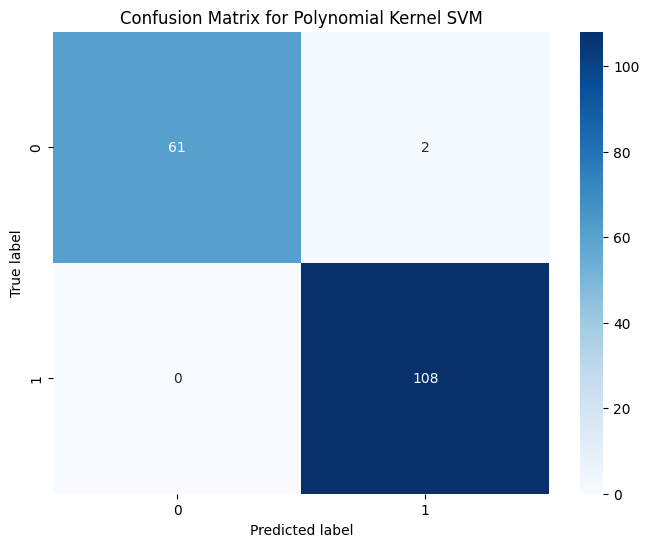

Best Parameters: {'C': 1, 'coef0': 1, 'degree': 4, 'gamma': 'scale'}
Accuracy of Best Model: 97.6608187134503


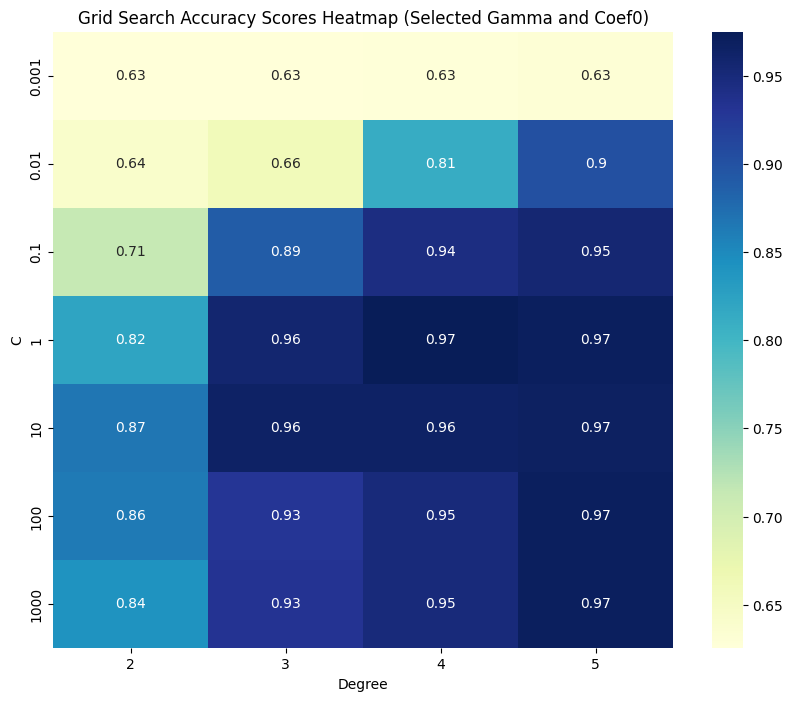

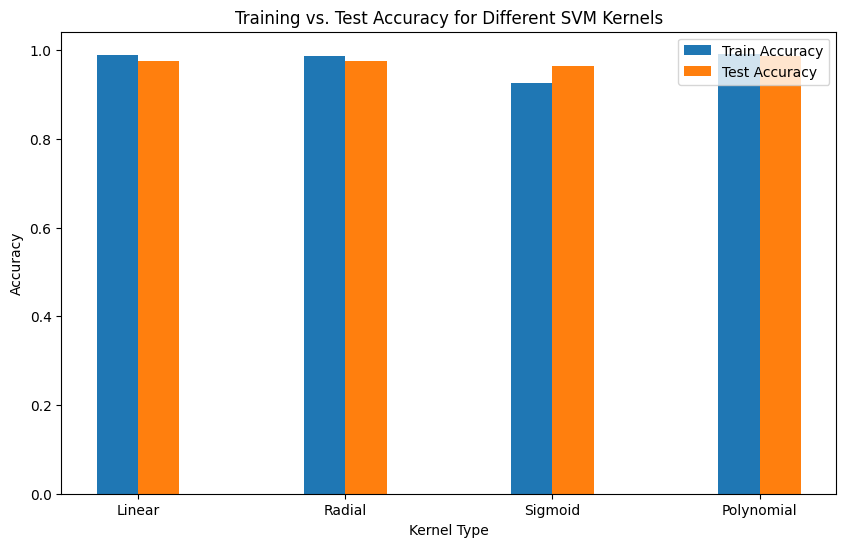

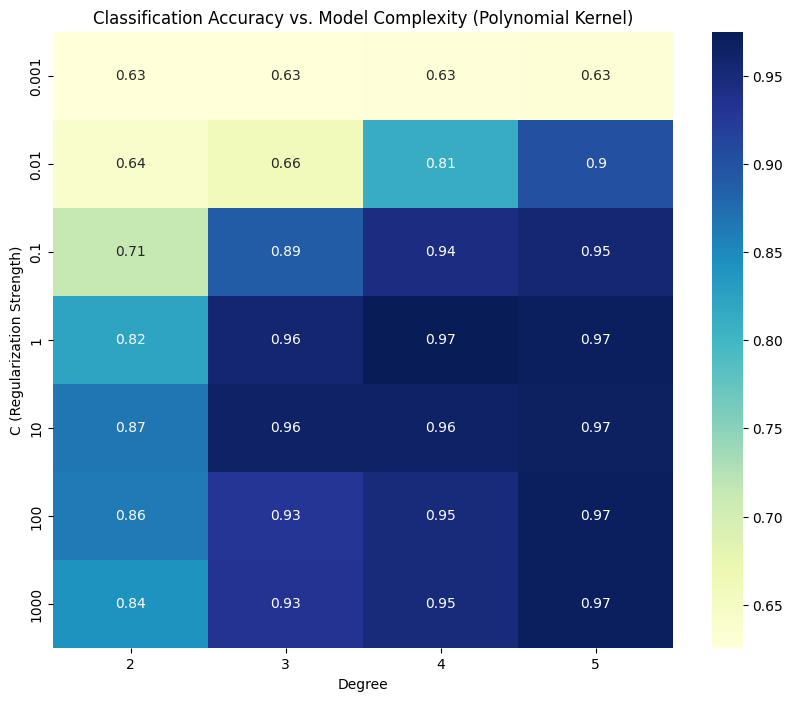

In [1]:
"""
Author: Shubham
"""

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Note: Use transform here, not fit_transform

# Train SVM models with different kernels
svm_model_linear = SVC(kernel='linear').fit(X_train_scaled, y_train)
svm_model_radial = SVC(kernel='rbf', gamma='scale').fit(X_train_scaled, y_train)
svm_model_sigmoid = SVC(kernel='sigmoid', gamma='scale', coef0=0).fit(X_train_scaled, y_train)
svm_model_poly = SVC(kernel='poly', degree=3, coef0=1).fit(X_train_scaled, y_train)

# Make predictions with each model
y_pred_linear = svm_model_linear.predict(X_test_scaled)
y_pred_radial = svm_model_radial.predict(X_test_scaled)
y_pred_sigmoid = svm_model_sigmoid.predict(X_test_scaled)
y_pred_poly = svm_model_poly.predict(X_test_scaled)

# Calculate and print accuracy for each model
print("Accuracy - Linear Kernel:", accuracy_score(y_test, y_pred_linear))
print("Accuracy - Radial Kernel:", accuracy_score(y_test, y_pred_radial))
print("Accuracy - Sigmoid Kernel:", accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy - Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))

# Plotting confusion matrix for the polynomial kernel model
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Polynomial Kernel SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Perform Grid Search for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'coef0': [0.0, 0.1, 0.5, 1]
}
grid_search = GridSearchCV(svm_model_poly, param_grid, cv=5, scoring='accuracy', n_jobs=3)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and accuracy of the best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best) * 100)

# Generating a heatmap from the grid search results
# We extract the mean test scores and reshape them according to the parameter grid
scores_matrix = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']),
                                                                    len(param_grid['degree']),
                                                                    len(param_grid['gamma']),
                                                                    len(param_grid['coef0']))

# Here, we are selecting a specific 'gamma' and 'coef0' to visualize as an example
selected_gamma_index = 0  # Index corresponding to 'scale' in the 'gamma' list
selected_coef0_index = 0  # Index corresponding to 0.0 in the 'coef0' list

# Plotting the heatmap for the selected slice of hyperparameters
plt.figure(figsize=(10, 8))
sns.heatmap(scores_matrix[:, :, selected_gamma_index, selected_coef0_index], annot=True, cmap='YlGnBu',
            xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Grid Search Accuracy Scores Heatmap (Selected Gamma and Coef0)')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()

train_accuracy_linear = accuracy_score(y_train, svm_model_linear.predict(X_train_scaled))
train_accuracy_radial = accuracy_score(y_train, svm_model_radial.predict(X_train_scaled))
train_accuracy_sigmoid = accuracy_score(y_train, svm_model_sigmoid.predict(X_train_scaled))
train_accuracy_poly = accuracy_score(y_train, svm_model_poly.predict(X_train_scaled))

# Plotting Training vs. Test Accuracy for each kernel
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(4)

bar1 = plt.bar(index, [train_accuracy_linear, train_accuracy_radial, train_accuracy_sigmoid, train_accuracy_poly], bar_width, label='Train Accuracy')
bar2 = plt.bar(index + bar_width, [accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_radial), accuracy_score(y_test, y_pred_sigmoid), accuracy_score(y_test, y_pred_poly)], bar_width, label='Test Accuracy')

plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy for Different SVM Kernels')
plt.xticks(index + bar_width / 2, ['Linear', 'Radial', 'Sigmoid', 'Polynomial'])
plt.legend()
plt.show()

# Plotting Classification Metric vs. Model Complexity
# Extracting mean test scores for a specific 'gamma' and 'coef0'
mean_test_scores = scores_matrix[:, :, selected_gamma_index, selected_coef0_index]

# Plotting heatmap for each 'C' and 'degree' combination
plt.figure(figsize=(10, 8))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu', xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Classification Accuracy vs. Model Complexity (Polynomial Kernel)')
plt.xlabel('Degree')
plt.ylabel('C (Regularization Strength)')
plt.show()